# Word Cloud

In [1]:
import numpy as np 
import pandas as pd
from PIL import Image

In [2]:
%matplotlib inline

import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle charts 

mpl.style.use('ggplot') # optional

In [6]:
# import data imigrasi canada
df_can = pd.read_excel('Canada.xlsx',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)

# kita mau drop kolom yang tidak kita pakai 
df_can.drop(['AREA','DEV','REG','Type','Coverage','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49','Unnamed: 50'],
           axis=1, inplace=True)

# merubah nama kolom 
df_can.rename(columns={
    "OdName" : "Country",
    "RegName" : "Region",
    "AreaName" : "Continent"
}, inplace=True)

# kita set indexnya menggunakan nama negaranya saja 
df_can.set_index('Country',inplace=True)

# kita tambahkan kolom total 
df_can['Total'] = df_can.sum(axis=1)

years = range(1980,2014)

In [7]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [9]:
df_can.loc[['China','India']]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


In [12]:
# import package yang diperlukan untuk wordcloud 
!pip install wordcloud 

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [42]:
# kita bikin wordcloud yang menunjukkan negara mana yang paling sering pindah ke Canada
total_immigration = df_can['Total'].sum()

max_words = 9000
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1: # kita mengabaikan semua negara yang bukan 1 kata, mungkin bisa diakalin saja diubah jadi 1 kata seperti United-Kingdom
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
# print(word_string)

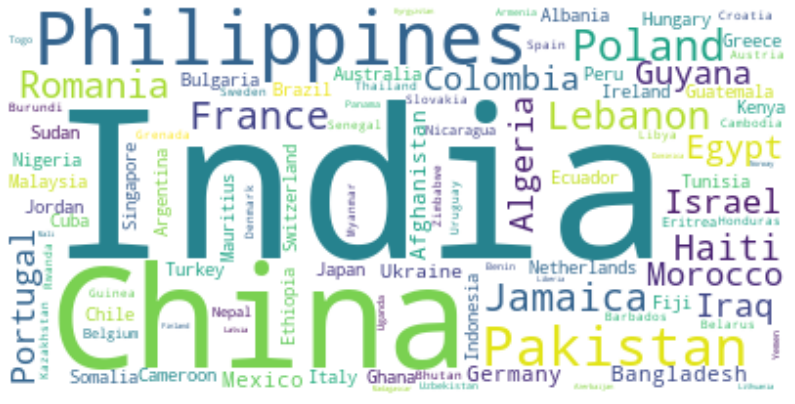

In [43]:
wc_can = WordCloud(background_color = "white", collocations=False).generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wc_can, interpolation='bilinear')
plt.axis('off')
plt.show()

# Alice in Wonderland Word Cloud

In [45]:
alice_novel = open('alice_novel.txt','r').read()
print(len(alice_novel))

145192


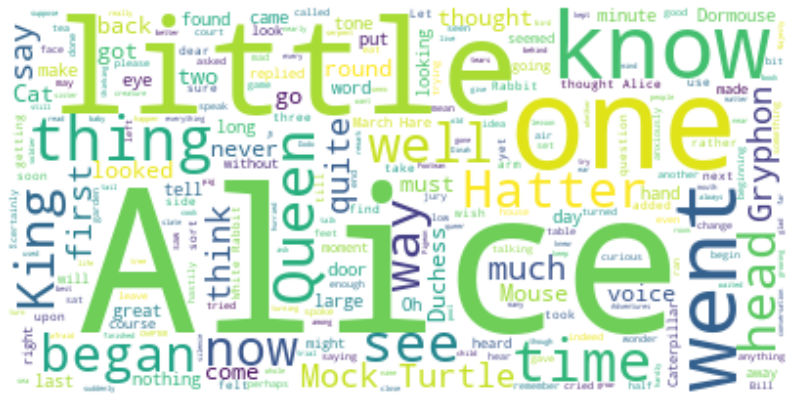

In [49]:
STOPWORDS.add('said')

alice_wc = WordCloud(
    background_color = "white",
    max_words = 2000,
    stopwords = STOPWORDS
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
alice_mask = np.array(Image.open('alice_mask.png'))
print(alice_mask.shape)

(900, 900)


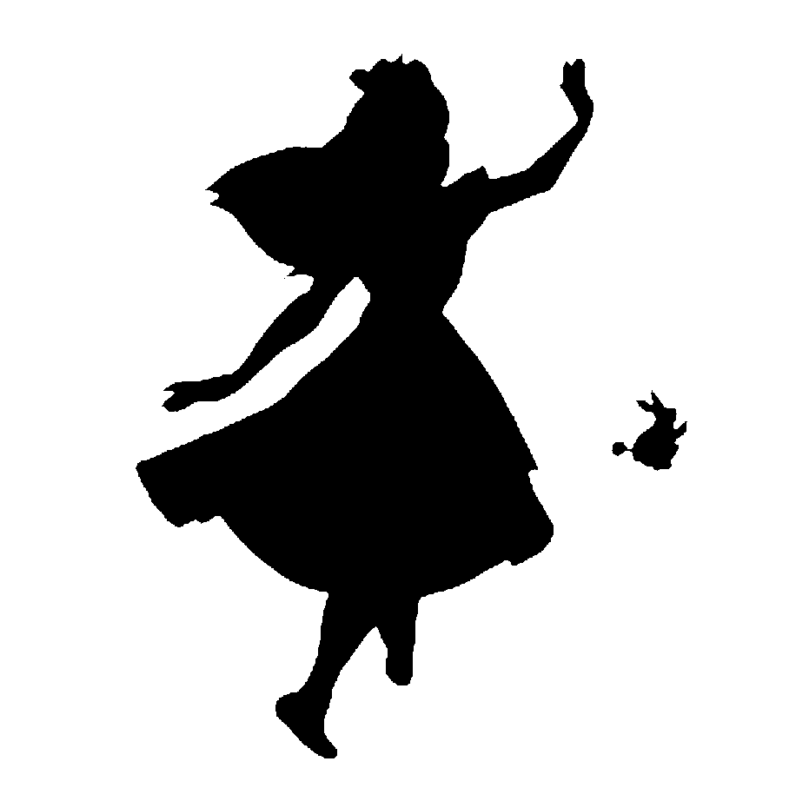

In [54]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

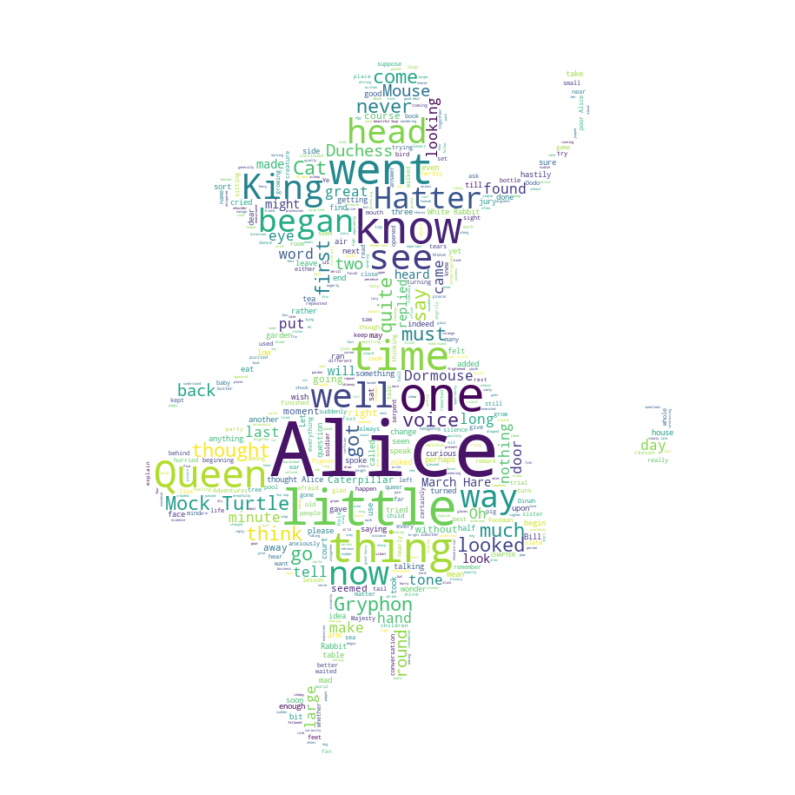

In [55]:
alice_wc = WordCloud(
    background_color="white",
    max_words=2000, # maximum kata yang muncul di wordcloud nya
    stopwords=STOPWORDS,
    mask=alice_mask
)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [3]:
!pip install folium 
import folium

In [4]:
world_map = folium.Map()

world_map

In [6]:
map_h8 = folium.Map(location=[-6.260727, 106.781632], zoom_start=100)
map_h8

In [7]:
# cobain opsi tiles untuk warna map yang berbeda 
map_h8 = folium.Map(location=[-6.260727, 106.781632], zoom_start=20, tiles=
                   "Stamen Watercolor")
map_h8

# Menambah Marker ke Map nya

In [8]:
map_h8 = folium.Map(location=[-6.260727, 106.781632], zoom_start=20, tiles =
                   "Stamen Toner")
map_h8.add_child(
        folium.CircleMarker(
            [-6.260727, 106.781632],
            radius=5, # define how big you want the circle markers to be
            color="yellow",
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
)

In [10]:
df_crime = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
print(df_crime.shape)
df_crime.head()

(150500, 13)


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [12]:
# kita ambil 100 baris pertama saja
df_crime100 = df_crime.iloc[0:100,:]
df_crime100.shape

(100, 13)

In [13]:
# bikin map sf dulu 
lat = 37.77 
lon = -122.42 
map_sf = folium.Map(location=[lat,lon], zoom_start=12)

# untuk setiap kejadian kejahatan 
# untuk setiap kejahatan dari koleksi kita df_crime100

# for crime in df_crime100;
# pint(crime) # tidak bisa karena dia ambil judul kolomnya saja 

# for a,b in zip([1,2],[3,4]):
# prnt(a,b)

# kita bias kimppulin marker 2 nya ke satu gruo dulu kalau mau 
# tidak harus langsung ditempel ke mapnya 
incident = folium.map.FeatureGroup()

for y, x in zip(df_crime100.Y, df_crime100.X):
    incident.add_child(
        folium.CircleMarker(
            [y,x],
            radius=5,
            color="yellow",
            fill=True,
            fill_color="gold",
            fill_opacity=0.6
            
        )
    )
map_sf.add_child(incident)

# Chloropleth Map

In [4]:
world_geo = r'.world_countries.json'

world_map = folium.Map(
        location=[0,0],
        zoom_start=2,
        titles='"http://{s}.tiles.mapbox.com/v4/wtgeographer.2fb7fc73/{z}/{x}/{y}.png?access_token=pk.eyJ1Ijoic3RlZmt3YW4iLCJhIjoiY2twMjV2ajdkMTZrbzJucHI3YTgxbjM2diJ9.oHD6Rw0KJYhnaYzK2pL__Q',
        attr='XXX Mapbox Attribution'
)

folium.Choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'], # perhatikan kolom Country nya tidak boleh ada di index
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

world_map

NameError: name 'df_can' is not defined